# MOW 323 

# Lanz Ebersohn


# u18285229

In [1]:
try:
    import os    
    if "add_engmod.py" in os.listdir(): 
        print("Exists!"); import add_engmod
        print("Development version is loaded. For office use only.")
except:
    pass
try:
    import importlib; 
    import engmod.structfem as sfem; importlib.reload(sfem)
    import numpy as np 
    try:
        from datetime import datetime
        print(str(datetime.time(datetime.now())),'-',str(datetime.date(datetime.now())))
        import os
        print(os.getcwd())
    except: 
        pass    
    
except Exception as e:
    print(e)
    print("Engmod is not imported. Please ensure that the jupyter notebook and engmod folder is in the same directory.")
import matplotlib.pyplot as plt 

12:03:05.979126 - 2021-11-04
E:\OneDrive\TUKS\2021-3rd year\env\Scripts\MOW323\ST2


# Configuration1

## Finite Element Model (FEM)

In [5]:
nodecoor = np.array([
                    [0.0,0.0], # Node 0
                    [0.1,0.0], # Node 1
                    [0.2,0.0], # Node 2
                    [0.3,0.0], # Node 3
                    [0.4,0.0], # Node 4
                    [0.5,0.0], # Node 5
                    [0.6,0.0], # Node 6
                    [0.7,0.0], # Node 7
                    [0.8,0.0], # Node 8
                    [0.9,0.0], # Node 9
                    [1.0,0.0], # Node 10    
                    ])

elemconn = np.array([
                    [0,1], # Element 0
                    [1,2], # Element 1
                    [2,3], # Element 2
                    [3,4], # Element 3
                    [4,5], # Element 4
                    [5,6], # Element 5
                    [6,7], # Element 6
                    [7,8], # Element 7
                    [8,9], # Element 8    
                    [9,10] # Element 9   
                    ])

prescribed_displacement = np.array([
                                    [0,0,0],
                                    [0,1,0],
                                    [0,2,0],
                                    [10,1,0]])

prescribed_force = np.array([
                            [3,1,-500],
                            ])

A0 = 314.1592653589793  / 1E6
I0 = 7853.981633974483  / 1E12
A1 = 1256.6370614359173 / 1E6 
I1 = 125663.70614359173 / 1E12

element_properties_dict = {
    "A": np.array([A0,A0,A0,A0,A0,A1,A1,A1,A1,A1]),
    "I": np.array([I0,I0,I0,I0,I0,I1,I1,I1,I1,I1]),  
    "density": np.ones(elemconn.shape[0])*7800,    
    "E": np.ones(elemconn.shape[0]) * 200E9
}

fmn = sfem.FEM_Beam_2D(
                            nodecoor,
                            elemconn,
                            prescribed_displacement,
                            prescribed_force,
                            element_properties_dict,
                        )


In [6]:
fmn.solve()

{'displacements': array([ 0.        ,  0.        ,  0.        ,  0.        , -0.00021267,
        -0.00379594,  0.        , -0.00066769, -0.00484687,  0.        ,
        -0.00109055, -0.00315279,  0.        , -0.0012598 , -0.00030524,
         0.        , -0.0011662 ,  0.00210423,  0.        , -0.00094939,
         0.00222744,  0.        , -0.00072162,  0.00232327,  0.        ,
        -0.00048565,  0.00239172,  0.        , -0.00024419,  0.00243279,
         0.        ,  0.        ,  0.00244648]),
 'loads': array([   0.        ,  431.18584071,   81.18584071,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        , -500.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           

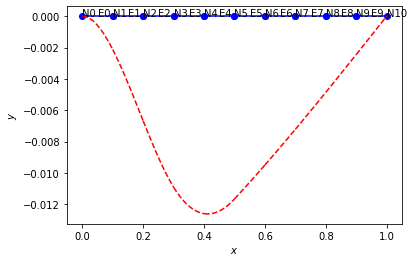

In [7]:
fmn.plot_system(show_displacement=True,magnification=10)

## a.)Getting modes and frequencies

In [8]:
fmn.eigen()

{'natural_frequencies_hz': array([  59.23277369,  313.20004061,  538.51607018,  747.58647708,
        1006.66787863, 1533.46448627, 2092.7981262 , 3036.9431254 ,
        3649.07402591, 4368.13669735, 5252.47092797]),
 'modes': array([[-2.99524602e-16,  1.33026116e-16,  2.41287499e-15,
         -8.37142522e-02,  2.50528799e-15,  1.35245621e-16,
          4.44769503e-16, -4.92853520e-17, -2.85378310e-16,
          4.72214058e-01, -8.61912835e-16],
        [ 8.72377389e-02,  4.03296093e-01,  4.95655630e-01,
         -1.19848705e-14, -9.72883268e-01,  7.91685220e-01,
          1.21510467e+00, -9.74827630e-01,  7.98480660e-01,
         -2.85050819e-15, -5.52594942e-01],
        [ 1.58491824e+00,  6.46797337e+00,  6.96332548e+00,
         -1.07671816e-13, -9.93922772e+00,  4.53989915e+00,
          4.89767691e-01,  1.04867722e+01, -1.61787267e+01,
          1.28461338e-13,  3.48467040e+01],
        [-5.98301593e-16,  3.61146910e-16,  4.74992483e-15,
         -1.66709181e-01,  5.00608792e-15,

## b.) Displacement

In [11]:
fmn.post_get_displacement(6,1)

-0.0009493859961085109

## c.) Max BM

Minimum bending moment: -81.18584070795725
Maximum bending moment: 48.169911504406016


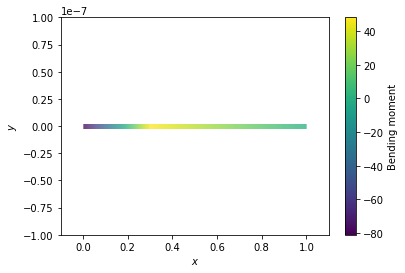

In [12]:
fmn.post_plot_bending_moment()

## d.) Normal stress at bm = 20

In [33]:
a = fmn.post_get_bending_moment(1)

I = (np.pi*20**4)/64
print(I,'DWS it is in section 1')

for idx,i in enumerate(a['moment']):
    if i > -20:
        posidx = idx
        
        break
        
ratio = (-20-a['moment'][posidx-1])/(a['moment'][posidx]-a['moment'][posidx-1])
#print(ratio)

xpos = a['x_coor'][posidx-1] + ratio*(a['x_coor'][posidx]-a['x_coor'][posidx-1])
print('xpos is at x=',xpos)

M = -20
y = 10
sigma = -(M*1000*y)/I

print(sigma,'[Mpa]')

7853.981633974483 DWS it is in section 1
xpos is at x= 0.1419013217305421
25.464790894703253 [Mpa]


## e.) and f.) Node to minimize 2nd natural frequency

In [40]:
#node 5
prescribed_displacement = np.array([[0,0,0],[0,1,0],[0,2,0],[5,1,0],[10,1,0]])
fmn = sfem.FEM_Beam_2D(nodecoor,elemconn,prescribed_displacement,prescribed_force,element_properties_dict)
fmn.solve()
print('2nd natural frequency_hz with node 5 roller:')
print(fmn.eigen()['natural_frequencies_hz'][1])
#node 6
prescribed_displacement = np.array([[0,0,0],[0,1,0],[0,2,0],[6,1,0],[10,1,0]])
fmn = sfem.FEM_Beam_2D(nodecoor,elemconn,prescribed_displacement,prescribed_force,element_properties_dict)
fmn.solve()
print('2nd natural frequency_hz with node 6 roller:')
print(fmn.eigen()['natural_frequencies_hz'][1])
#node 7
prescribed_displacement = np.array([[0,0,0],[0,1,0],[0,2,0],[7,1,0],[10,1,0]])
fmn = sfem.FEM_Beam_2D(nodecoor,elemconn,prescribed_displacement,prescribed_force,element_properties_dict)
fmn.solve()
print('2nd natural frequency_hz with node 7 roller:')
print(fmn.eigen()['natural_frequencies_hz'][1])
#node 8
prescribed_displacement = np.array([[0,0,0],[0,1,0],[0,2,0],[8,1,0],[10,1,0]])
fmn = sfem.FEM_Beam_2D(nodecoor,elemconn,prescribed_displacement,prescribed_force,element_properties_dict)
fmn.solve()
print('2nd natural frequency_hz with node 8 roller:')
print(fmn.eigen()['natural_frequencies_hz'][1])
#node 9
prescribed_displacement = np.array([[0,0,0],[0,1,0],[0,2,0],[9,1,0],[10,1,0]])
fmn = sfem.FEM_Beam_2D(nodecoor,elemconn,prescribed_displacement,prescribed_force,element_properties_dict)
fmn.solve()
print('2nd natural frequency_hz with node 9 roller:')
print(fmn.eigen()['natural_frequencies_hz'][1])

2nd natural frequency_hz with node 5 roller:
378.94850451049484
2nd natural frequency_hz with node 6 roller:
510.9850751688877
2nd natural frequency_hz with node 7 roller:
492.8446599625217
2nd natural frequency_hz with node 8 roller:
421.0981448427927
2nd natural frequency_hz with node 9 roller:
384.1524883188241


With the trial and error method above it can be seen that the lowwest frequency is obtainded with a roller at node 5.

## g.) Material change

In [41]:
#reset boundary conditions
prescribed_displacement = np.array([[0,0,0],[0,1,0],[0,2,0],[10,1,0]])
element_properties_dict = {
    "A": np.array([A0,A0,A0,A0,A0,A1,A1,A1,A1,A1]),
    "I": np.array([I0,I0,I0,I0,I0,I1,I1,I1,I1,I1]),  
    "density": np.ones(elemconn.shape[0])*3000,    
    "E": np.ones(elemconn.shape[0]) * 150E9
}
fmn = sfem.FEM_Beam_2D(nodecoor,elemconn,prescribed_displacement,prescribed_force,element_properties_dict)
fmn.solve()
print('3rd natural frequency_hz with new material:')
print(fmn.eigen()['natural_frequencies_hz'][2])

3rd natural frequency_hz with new material:
751.9967671357812


## h.) Configuration2 

Upward reaction load at x = 0:
301.09734513274725 [N]


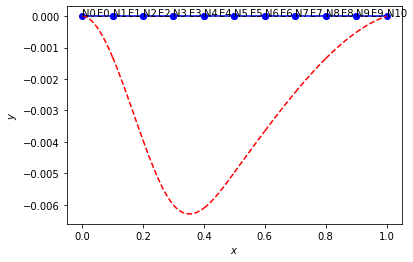

In [52]:
nodecoor = np.array([
                    [0.0,0.0], # Node 0
                    [0.1,0.0], # Node 1
                    [0.2,0.0], # Node 2
                    [0.3,0.0], # Node 3
                    [0.4,0.0], # Node 4
                    [0.5,0.0], # Node 5
                    [0.6,0.0], # Node 6
                    [0.7,0.0], # Node 7
                    [0.8,0.0], # Node 8
                    [0.9,0.0], # Node 9
                    [1.0,0.0], # Node 10    
                    ])

elemconn = np.array([
                    [0,1], # Element 0
                    [1,2], # Element 1
                    [2,3], # Element 2
                    [3,4], # Element 3
                    [4,5], # Element 4
                    [5,6], # Element 5
                    [6,7], # Element 6
                    [7,8], # Element 7
                    [8,9], # Element 8    
                    [9,10] # Element 9   
                    ])

prescribed_displacement = np.array([
                                    [0,0,0],
                                    [0,1,0],
                                    [0,2,0],
                                    [10,1,0]])

prescribed_force = np.array([
                            [3,1,-500],
                            [10,2,-100],
])

A0 = 314.1592653589793  / 1E6
I0 = 7853.981633974483  / 1E12
A1 = 1256.6370614359173 / 1E6 
I1 = 125663.70614359173 / 1E12

element_properties_dict = {
    "A": np.array([A0,A0,A0,A0,A0,A1,A1,A1,A1,A1]),
    "I": np.array([I0,I0,I0,I0,I0,I1,I1,I1,I1,I1]),  
    "density": np.ones(elemconn.shape[0])*7800,    
    "E": np.ones(elemconn.shape[0]) * 200E9
}

fmn = sfem.FEM_Beam_2D(
                            nodecoor,
                            elemconn,
                            prescribed_displacement,
                            prescribed_force,
                            element_properties_dict,
                        )
fmn.solve()
fmn.plot_system(show_displacement=True,magnification=10)
print('Upward reaction load at x = 0:')
print(fmn.solution_dict['loads'][1],'[N]')

### Backup of code if you want to revert back to the original code, copy this and paste this into you cell.

```python

nodecoor = np.array([
                    [0.0,0.0], # Node 0
                    [0.1,0.0], # Node 1
                    [0.2,0.0], # Node 2
                    [0.3,0.0], # Node 3
                    [0.4,0.0], # Node 4
                    [0.5,0.0], # Node 5
                    [0.6,0.0], # Node 6
                    [0.7,0.0], # Node 7
                    [0.8,0.0], # Node 8
                    [0.9,0.0], # Node 9
                    [1.0,0.0], # Node 10    
                    ])

elemconn = np.array([
                    [0,1], # Element 0
                    [1,2], # Element 1
                    [2,3], # Element 2
                    [3,4], # Element 3
                    [4,5], # Element 4
                    [5,6], # Element 5
                    [6,7], # Element 6
                    [7,8], # Element 7
                    [8,9], # Element 8    
                    [9,10] # Element 9   
                    ])

prescribed_displacement = np.array([
                                    [0,0,0],
                                    [0,1,0],
                                    [0,2,0],
                                    [10,1,0]])

prescribed_force = np.array([
                            [3,1,-500],
                            ])

A0 = 314.1592653589793  / 1E6
I0 = 7853.981633974483  / 1E12
A1 = 1256.6370614359173 / 1E6 
I1 = 125663.70614359173 / 1E12

element_properties_dict = {
    "A": np.array([A0,A0,A0,A0,A0,A1,A1,A1,A1,A1]),
    "I": np.array([I0,I0,I0,I0,I0,I1,I1,I1,I1,I1]),  
    "density": np.ones(elemconn.shape[0])*7800,    
    "E": np.ones(elemconn.shape[0]) * 200E9
}

fmn = sfem.FEM_Beam_2D(
                            nodecoor,
                            elemconn,
                            prescribed_displacement,
                            prescribed_force,
                            element_properties_dict,
                        )
```